In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('complete.csv')

In [3]:
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Latitude,Longitude,Death
0,2020-01-30,Kerala,1.0,0.0,0.0,10.8505,76.2711,0
1,2020-01-31,Kerala,1.0,0.0,0.0,10.8505,76.2711,0
2,2020-02-01,Kerala,2.0,0.0,0.0,10.8505,76.2711,0
3,2020-02-02,Kerala,3.0,0.0,0.0,10.8505,76.2711,0
4,2020-02-03,Kerala,3.0,0.0,0.0,10.8505,76.2711,0


# Data Cleaning

In [4]:
#First to convert the columns into simple labels with all lower strings. This will make my life a bit easier
df.columns = ['Date', 'State', 'Cases_IN',
       'Cases_FOR', 'Cured', 'Latitude',
       'Longitude', 'Death']
df.columns = df.columns.str.lower()

In [5]:
df.head()

,date,state,cases_in,cases_for,cured,latitude,longitude,death
0,2020-01-30,Kerala,1.0,0.0,0.0,10.8505,76.2711,0
1,2020-01-31,Kerala,1.0,0.0,0.0,10.8505,76.2711,0
2,2020-02-01,Kerala,2.0,0.0,0.0,10.8505,76.2711,0
3,2020-02-02,Kerala,3.0,0.0,0.0,10.8505,76.2711,0
4,2020-02-03,Kerala,3.0,0.0,0.0,10.8505,76.2711,0


In [6]:
#Now to change all float values to int values except in the lat & lon column.
df['cases_in'] = df['cases_in'].apply(int)
df['cases_for'] = df['cases_for'].apply(int)
df['cured'] = df['cured'].apply(int)

In [7]:
#Next step is to check if the date column is in datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       135 non-null    object 
 1   state      135 non-null    object 
 2   cases_in   135 non-null    int64  
 3   cases_for  135 non-null    int64  
 4   cured      135 non-null    int64  
 5   latitude   135 non-null    float64
 6   longitude  135 non-null    float64
 7   death      135 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 8.6+ KB


In [8]:
# Will use a simple pandas function called to_datetime to convert the values
df['date'] = pd.to_datetime(df['date'])

In [9]:
#Lets cross check the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       135 non-null    datetime64[ns]
 1   state      135 non-null    object        
 2   cases_in   135 non-null    int64         
 3   cases_for  135 non-null    int64         
 4   cured      135 non-null    int64         
 5   latitude   135 non-null    float64       
 6   longitude  135 non-null    float64       
 7   death      135 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 8.6+ KB


Next step we can drop the Lat & Long columns as the dataalready contains the state (Location) column which is more than enough 

In [10]:
df.drop(labels=['latitude', 'longitude'], axis=1, inplace=True)

In [11]:
#We can now create a new column as a combination of the rows cases_in + cases_for
def add_col_val(cols):
    in_nat = cols[0]
    for_nat = cols[1]
    return in_nat + for_nat

df['total_cases'] =  df[['cases_in', 'cases_for']].apply(add_col_val, axis=1)

#### There seem to be no missing values in the dataframe and the data cleaning is all done. Now lets move on to data analysis.

# EDA (Exploratory Data Analysis)

In [12]:
df.head()

,date,state,cases_in,cases_for,cured,death,total_cases
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


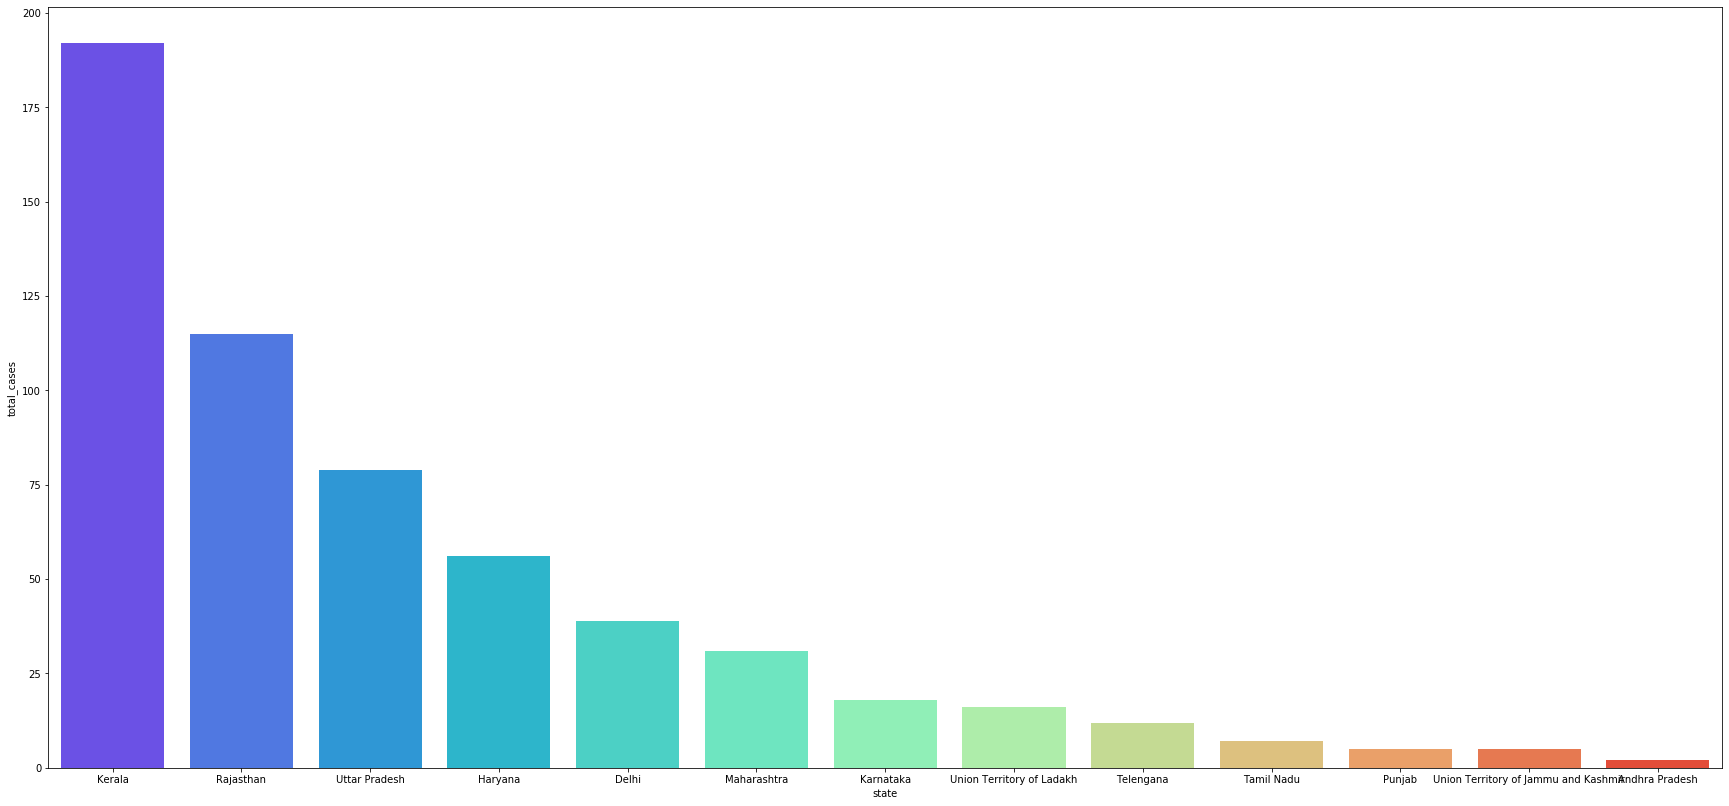

In [13]:
#Lets do a state wise analysis to find out the totals based on state. for this we need to group the Main dataframe as below.
df_by_state = df.groupby(by='state', as_index=None).sum().sort_values(by='total_cases',ascending=False)
# Now lets visualize the total cases 
plt.figure(figsize=(30,14))
sns.barplot(x='state', y='total_cases', data=df_by_state,palette='rainbow')

In [15]:
#from plotly.offline import init_notebook_mode, iplot
#from plotly.graph_objects import *
#import cufflinks as cf
#init_notebook_mode(connected=True)
#cf.go_offline()